In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("E:/Term3/Banking/Clustering investment bank.csv")

In [3]:
data.head()

,Industry Name,Number of firms,EV/EBITDAR&D,EV/EBITDA,EV/EBIT,EV/EBIT (1-t)
0,Advertising,3,19.620690,19.620690,38.457757,104.370728
1,Aerospace/Defense,4,19.752130,19.772322,22.528760,30.205643
2,Air Transport,6,6.141390,6.141390,11.394131,12.997837
3,Apparel,314,9.629156,9.699331,18.450467,26.675986
4,Auto & Truck,12,7.930071,9.792722,13.290504,18.142346


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
Industry Name      48 non-null object
Number of firms    48 non-null int64
EV/EBITDAR&D       48 non-null float64
EV/EBITDA          48 non-null float64
EV/EBIT            48 non-null float64
EV/EBIT (1-t)      48 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.3+ KB


In [40]:
data.isnull().sum() ## NO NULL VALUE

Industry Name      0
Number of firms    0
EV/EBITDAR&D       0
EV/EBITDA          0
EV/EBIT            0
EV/EBIT (1-t)      0
dtype: int64

In [7]:
x=data.iloc[:,[1,5]].values ## considering all the columns except Industry name


## Apllying Kmeans clustering

In [8]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score


 ## finding the optimal k ,we will try to use both sillouette score and elbow curve method

In [12]:
## silhouette_score


for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(x)
    label = kmeans.labels_
    sil_coeff = silhouette_score(x, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.657784593366639
For n_clusters=3, The Silhouette Coefficient is 0.6403025789223946
For n_clusters=4, The Silhouette Coefficient is 0.5290899088198099
For n_clusters=5, The Silhouette Coefficient is 0.5732930145049687
For n_clusters=6, The Silhouette Coefficient is 0.5432642800552522
For n_clusters=7, The Silhouette Coefficient is 0.4022674536865101
For n_clusters=8, The Silhouette Coefficient is 0.40800258661433086
For n_clusters=9, The Silhouette Coefficient is 0.4247640838067695
For n_clusters=10, The Silhouette Coefficient is 0.3967610741690666


## the optimal number of k given by sillouette score is 3

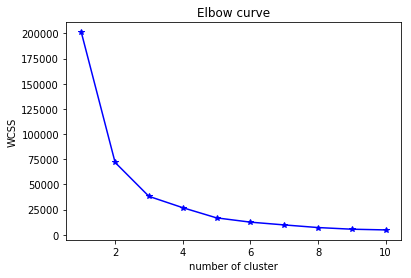

In [11]:
## Elbow curve


wcss=[]
for i in range(1,11): 
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0) ## k-mean++ for avoiding random initalization trap
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'b*-')
plt.title("Elbow curve")
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

## OR using Visualizer method

In [13]:
from yellowbrick.cluster import KElbowVisualizer

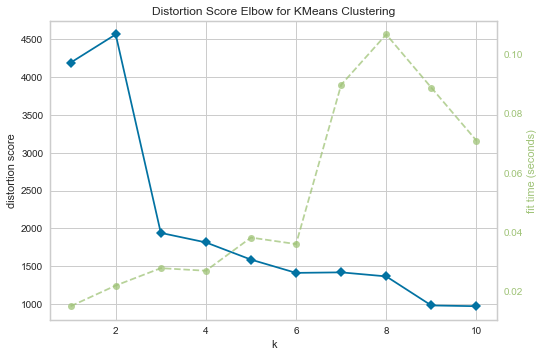

In [14]:
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(x)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

## optimal number of k is 4,Implementing the kmeans to predict clusters

In [15]:
## applying the optimal number of k on the dataset

kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)

y_kmeans=kmeans.fit_predict(x)

y_kmeans

array([0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 3, 0, 0, 1, 3,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0,
       0, 0, 3, 3])

In [17]:
print("Center of clusters:",kmeans.cluster_centers_,sep='\n') ## clusters centers

Center of clusters:
[[ 14.375       30.24936376]
 [141.14285714  24.54112739]
 [314.          26.67598563]
 [ 76.25        30.55906448]]


In [19]:
## DataFrame showing the predicted cluster corresponding to industries

cluster_of_industry=pd.DataFrame()

cluster_of_industry['Industry name']=data['Industry Name']

cluster_of_industry['Cluster number']=kmeans.labels_

cluster_of_industry

,Industry name,Cluster number
0,Advertising,0
1,Aerospace/Defense,0
2,Air Transport,0
3,Apparel,2
4,Auto & Truck,0
5,Auto Parts,3
6,Beverage (Alcoholic),0
7,Beverage (Soft),0
8,Broadcasting,0
9,Building Materials,0


## Plotting the clusters

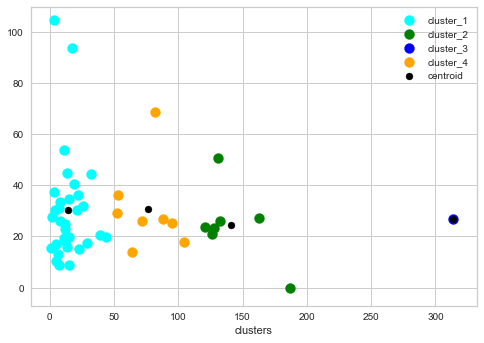

In [20]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='cyan',label='cluster_1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='green',label='cluster_2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='blue',label='cluster_3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='orange',label='cluster_4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',label='centroid')
plt.xlabel('clusters')
plt.legend()
plt.show()

## Applying Hierarchical Clustering

In [21]:
from sklearn.preprocessing import StandardScaler  ## Standardising the data
sk=StandardScaler()


X=sk.fit_transform(x)

## Dendogram with both ward & complete method

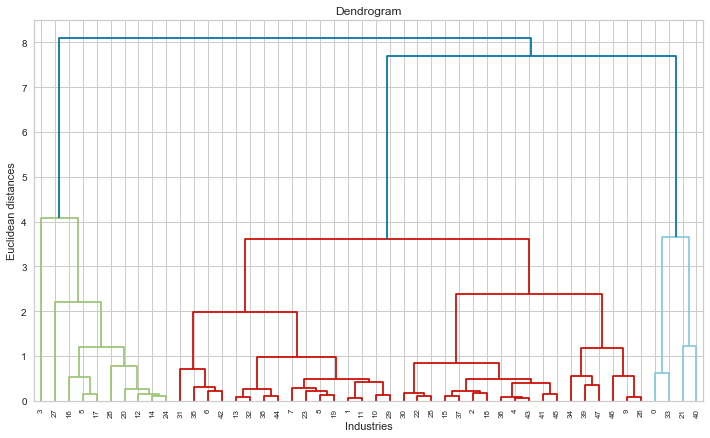

In [35]:
plt.figure(figsize=(12,7))


import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Industries')
plt.ylabel('Euclidean distances')
plt.show()



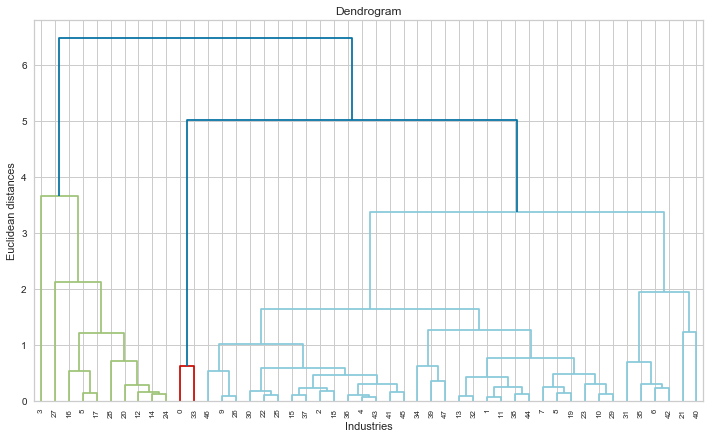

In [36]:
plt.figure(figsize=(12,7))


import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('Industries')
plt.ylabel('Euclidean distances')
plt.show()

In [37]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)



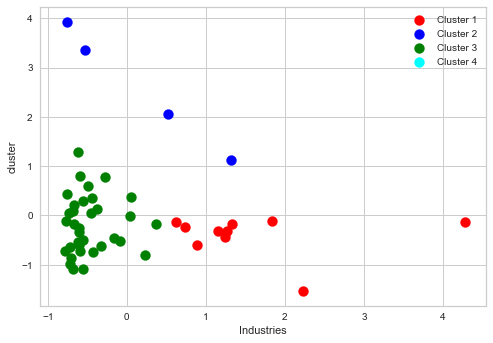

In [38]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.xlabel('Industries')
plt.ylabel('cluster')
plt.legend()
plt.show()

In [39]:
cluster_of_industry2=pd.DataFrame()

cluster_of_industry2['Industry name']=data['Industry Name']

cluster_of_industry2['Cluster number']=hc.labels_

cluster_of_industry2

,Industry name,Cluster number
0,Advertising,1
1,Aerospace/Defense,2
2,Air Transport,2
3,Apparel,0
4,Auto & Truck,2
5,Auto Parts,0
6,Beverage (Alcoholic),2
7,Beverage (Soft),2
8,Broadcasting,2
9,Building Materials,2
